# 4ª Lista de Aprendizado de Máquina
## Decision Tree

Aluno: | Hugo Silva de Vasconcelos
----|----
Matrícula: | 180102028
Dataset: | [Wine](http://archive.ics.uci.edu/dataset/109/wine)

In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
import math

Aproveitando os dados do dataset Wine, previamente tratados no notebook FNN.ipynb, vamos aplicar o algoritmo Decision Tree para classificar os vinhos em 3 classes e comparar os resultados com os obtidos pelo FNN.

In [2]:
#Load the data from the csv file

data = pd.read_csv('wine_normalizado.csv')

data.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,0,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


Separação dos dados em treino, teste e validação:

In [3]:
from sklearn.model_selection import train_test_split
#Separando classe dos dados
X = data.drop('Class label', axis=1)
y = data['Class label']

#Separando dados de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Separando dados de teste e validação

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.4)

### Iniciando o modelo de árvore de decisão

O modelo foi iniciado com critério de entropia e profundidade máxima de 3, pois em testes anteriores, foram os hiperparâmetros que apresentaram melhor resultado.

In [4]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=3)

#Treinando o modelo
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Obtendo os parâmetros do modelo e a representação gráfica da árvore

In [13]:
print("Parâmetros do modelo:")
print(model.get_params(), "\n")
print("Profundidade da árvore:")
print(model.get_depth(), "\n")
print("Número de folhas:")
print(model.get_n_leaves())

Parâmetros do modelo:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'} 

Profundidade da árvore:
3 

Número de folhas:
6


In [15]:
print("Representação da árvore de decisão:\n" )
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)

Representação da árvore de decisão:

|--- feature_6 <= -0.45
|   |--- feature_10 <= -0.12
|   |   |--- class: 2
|   |--- feature_10 >  -0.12
|   |   |--- feature_1 <= 0.66
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.66
|   |   |   |--- class: 2
|--- feature_6 >  -0.45
|   |--- feature_0 <= -0.27
|   |   |--- class: 1
|   |--- feature_0 >  -0.27
|   |   |--- feature_12 <= -0.50
|   |   |   |--- class: 1
|   |   |--- feature_12 >  -0.50
|   |   |   |--- class: 0



### Testes e resultados do modelo

Após treinado, são realizadas predições em um conjunto de testes.

In [6]:
y_pred = model.predict(X_test)

Comparando os resultados obtidos com os rótulos reais.

In [7]:
print("Predições: ")
print(y_pred)

print("Valores reais: ")
print(y_test.values)


Predições: 
[0 2 2 2 1 2 1 1 1 0 0 1 1 2 1 0 1 1 0 0 0 2 0 1 2 1 0 1 1 0 2 0]
Valores reais: 
[0 2 1 2 1 2 1 1 1 0 0 1 1 2 1 0 1 1 0 0 0 2 0 1 2 1 0 1 1 0 2 0]


### Métricas de avaliação

Matriz de confusão

<Axes: >

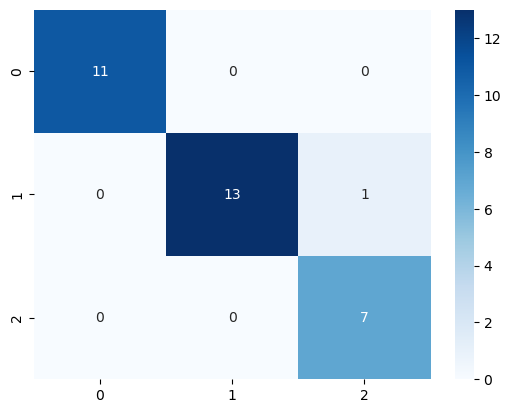

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
c_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(c_matrix, annot=True, cmap='Blues')

Acurácia

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.96875

Precisão, Recall e F1-Score, para cada classe, pela função classification_report do scikit-learn

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['1', '2', '3']))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      0.93      0.96        14
           3       0.88      1.00      0.93         7

    accuracy                           0.97        32
   macro avg       0.96      0.98      0.97        32
weighted avg       0.97      0.97      0.97        32



### Resultados

Observou-se que apesar de boas métricas, o modelo de Árvore de Decisão teve desempenho inferior às redes neurais feedforward, contudo, é de se esperar tal diferença no desempenho devido à diferença de complexidade de ambas.